In [4]:
import pandas as pd

df = pd.read_csv('metrics.csv')
df

,B2,B3,B4,Rouge1,Rouge2,RougeL,RougeLsum,turn
0,4.887165e-01,3.728102e-01,5.554672e-78,0.888889,0.857143,0.888889,0.888889,1
1,3.279834e-01,2.306645e-01,1.631248e-01,0.600000,0.384615,0.600000,0.600000,2
2,6.305110e-155,4.415679e-204,9.751522e-232,0.484848,0.387097,0.484848,0.484848,3
3,1.984801e-01,1.122913e-01,2.028801e-78,0.461538,0.131579,0.250000,0.435897,4
4,1.382128e-02,8.225271e-104,5.693312e-156,0.415094,0.142857,0.333333,0.409091,5
...,...,...,...,...,...,...,...,...
95,4.612743e-155,3.730955e-204,8.817250e-232,0.740741,0.480000,0.666667,0.666667,5
96,4.122563e-155,3.066681e-204,6.967408e-232,0.380952,0.205128,0.341463,0.341463,6
97,4.306075e-155,3.918479e-204,9.788429e-232,0.412698,0.266667,0.380952,0.412698,7
98,9.872169e-156,7.399387e-205,1.687108e-232,0.266667,0.068182,0.263158,0.263158,8


## performance in depth analysis

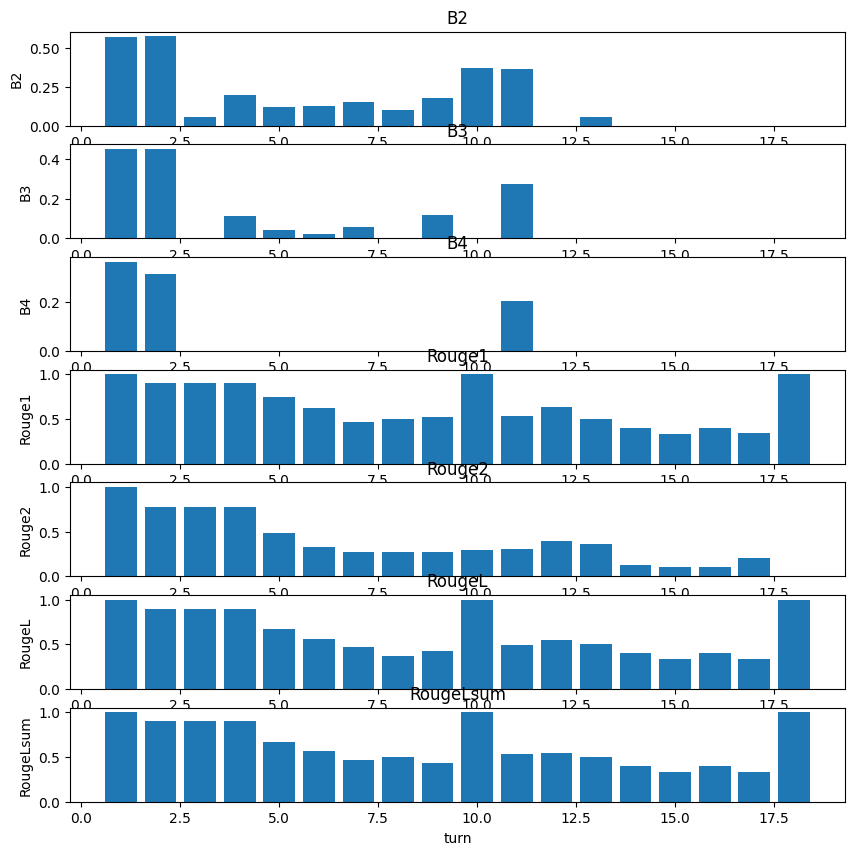

In [9]:
import matplotlib.pyplot as plt

ycols = [y for y in df.columns if y != 'turn']
xcol = 'turn'


#todo: what is the jump in turn 10
# plot each y col wrt xcol in subplots
# for each subplot plot plot bar plot
fig, axs = plt.subplots(len(ycols), 1, figsize=(10, 10))
for i, ycol in enumerate(ycols):
    axs[i].bar(df[xcol], df[ycol])
    axs[i].set_title(ycol)
    axs[i].set_xlabel(xcol)
    axs[i].set_ylabel(ycol)